Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Reference choice (must be partial-ref or full-ref)
reference_choice = environ['reference_choice']

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [3]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [5]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [6]:
result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results.csv') % taxonomic_level
if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)
    simulated_results.to_csv()

In [7]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

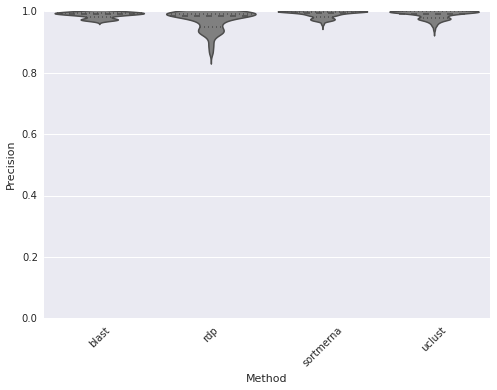

In [8]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

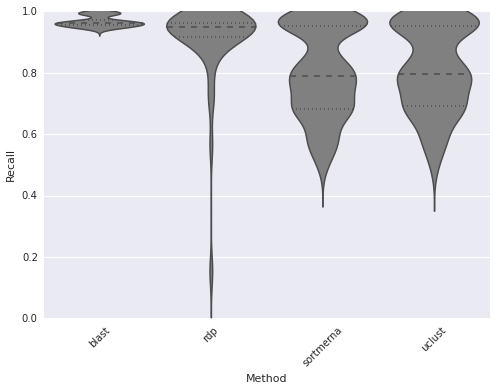

In [9]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

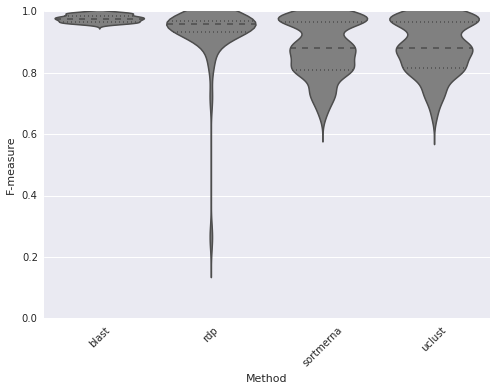

In [10]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

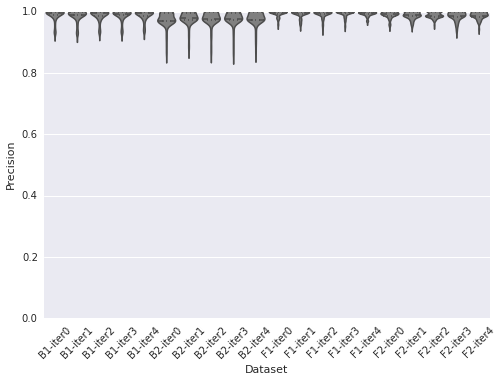

In [11]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

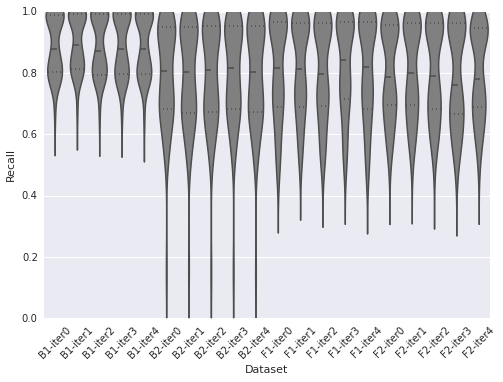

In [12]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

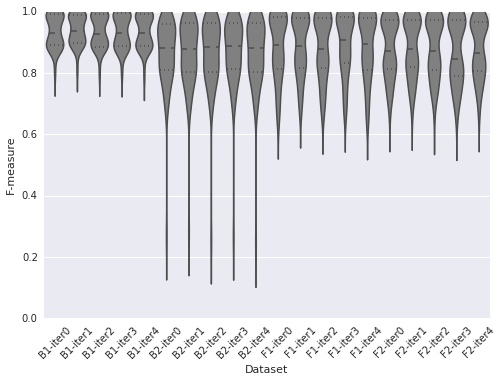

In [13]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


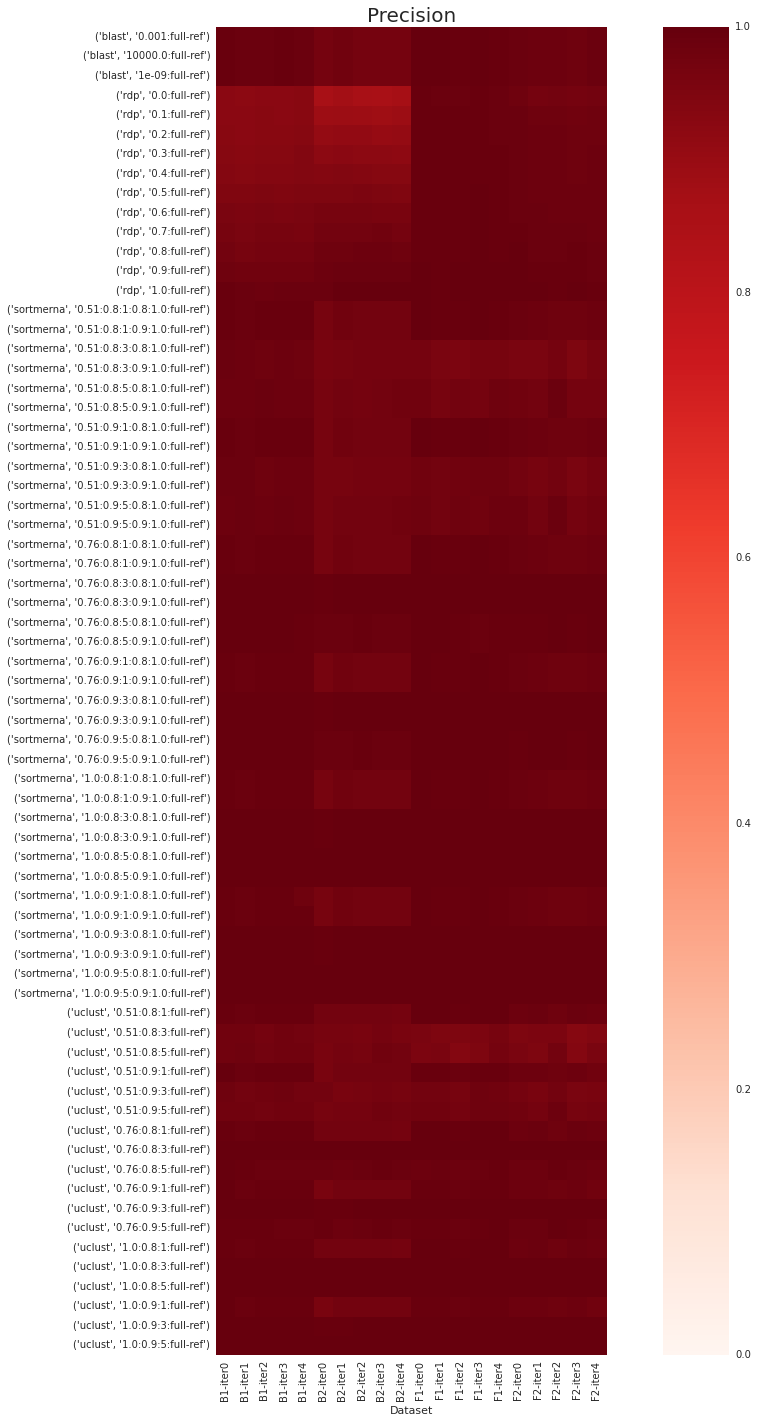

In [14]:
heatmap_from_data_frame(simulated_results, "Precision")

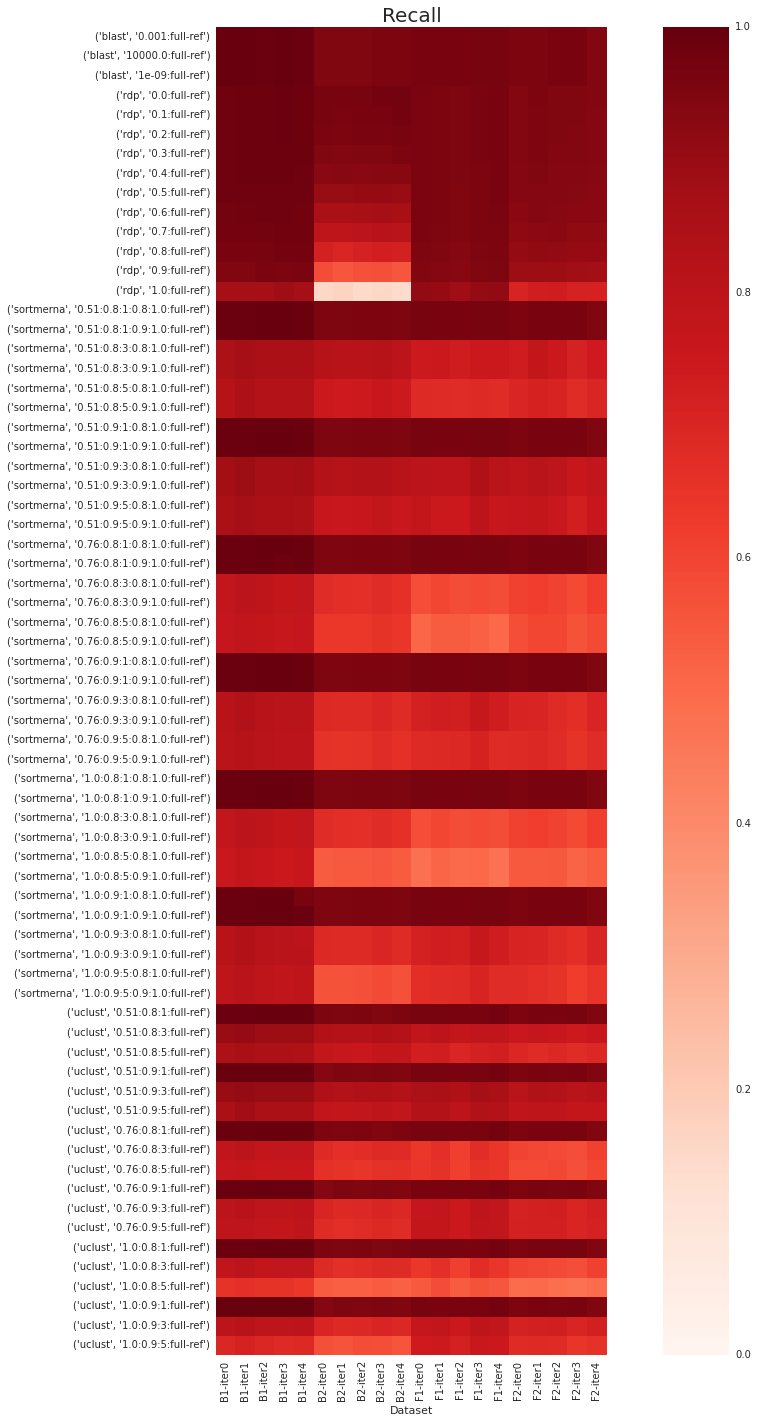

In [15]:
heatmap_from_data_frame(simulated_results, "Recall")

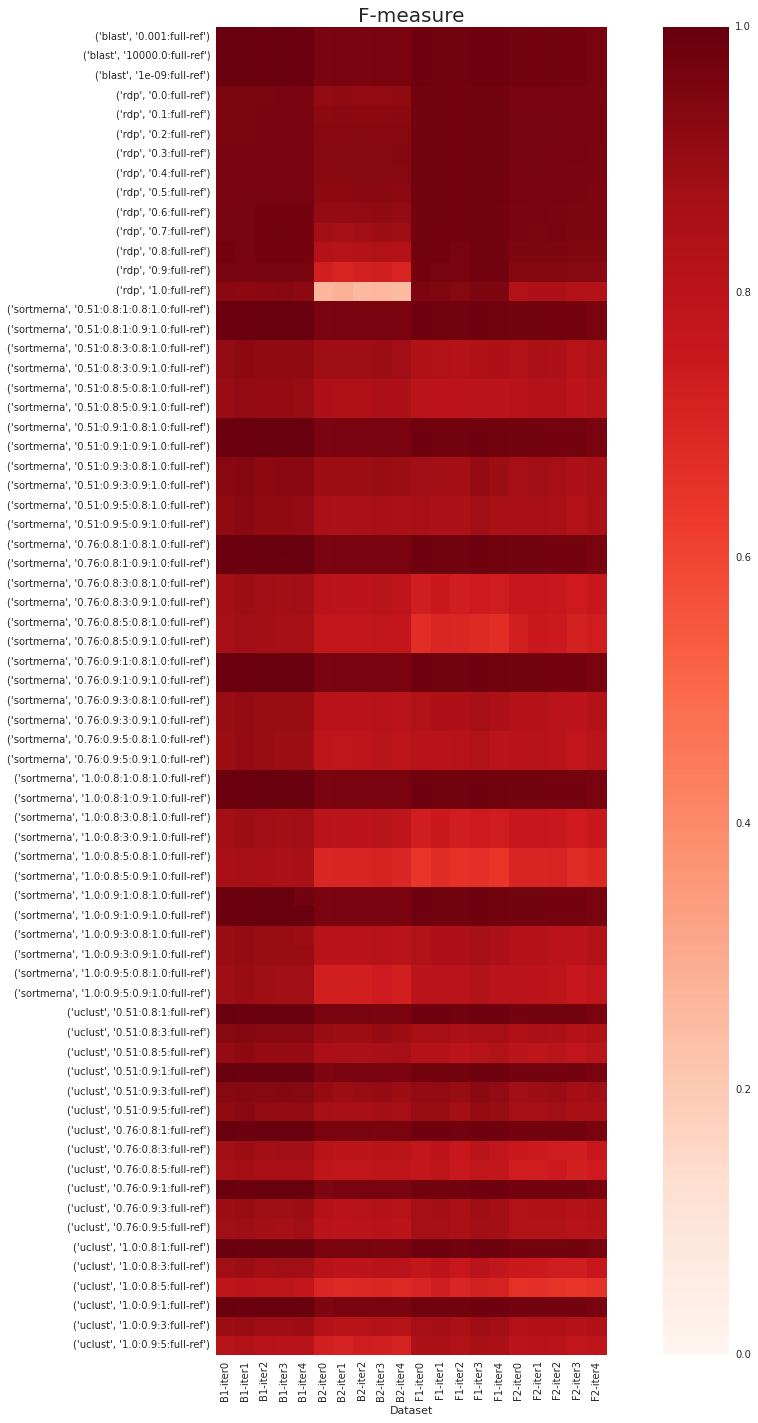

In [16]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [17]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision    Recall  F-measure
270     uclust   0.996817  0.992395   0.994601
211      blast   0.994297  0.994297   0.994297
164  sortmerna   0.994901  0.989227   0.992056
228        rdp   0.976236  0.963245   0.969697

In [18]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2163     uclust   0.974009  0.954777   0.964297
2044  sortmerna   0.968223  0.950955   0.959512
2115      blast   0.970013  0.947771   0.958763
2129        rdp   0.922408  0.946497   0.934297

In [19]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision    Recall  F-measure
2027     uclust   0.998737  0.965812   0.981999
1908  sortmerna   0.996222  0.965812   0.980781
1979      blast   0.997475  0.964591   0.980757
1989        rdp   0.993679  0.959707   0.976398

In [20]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision    Recall  F-measure
1092  sortmerna   0.990789  0.956798   0.973497
1161      blast   0.990777  0.955527   0.972833
1191     uclust   0.985602  0.956798   0.970986
1179        rdp   0.989333  0.942821   0.965517

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved within one mean absolute deviation of the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [21]:
metrics = ['Precision', 'Recall', 'F-measure']

In [22]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=metrics)
rdp_top_params[:15]

F-measure  Precision  Recall
0.6:full-ref         20          4      20
0.7:full-ref         20          7      19
0.8:full-ref         20         13      12
0.5:full-ref         19          1      20
0.4:full-ref         17          0      20
0.0:full-ref         15          0      20
0.1:full-ref         15          0      20
0.2:full-ref         15          0      20
0.3:full-ref         15          0      20
0.9:full-ref          7         18       0
1.0:full-ref          0         20       0

In [23]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=metrics)
uclust_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:full-ref         20         10      20
0.51:0.9:1:full-ref         20         10      20
0.76:0.8:1:full-ref         20         10      20
0.76:0.9:1:full-ref         20         10      20
1.0:0.8:1:full-ref          20         10      20
1.0:0.9:1:full-ref          20         10      20
0.51:0.9:3:full-ref          7          0      10
0.51:0.8:3:full-ref          4          0       4
0.76:0.8:3:full-ref          0         20       0
0.76:0.8:5:full-ref          0         12       0
0.76:0.9:3:full-ref          0         20       0
0.76:0.9:5:full-ref          0         17       0
1.0:0.8:3:full-ref           0         20       0
1.0:0.8:5:full-ref           0         20       0
1.0:0.9:3:full-ref           0         20       0

In [24]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=metrics)
sortmerna_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:0.8:1.0:full-ref         20          4      20
1.0:0.9:1:0.9:1.0:full-ref          20          4      20
1.0:0.8:1:0.8:1.0:full-ref          20          4      20
0.51:0.8:1:0.9:1.0:full-ref         20          4      20
1.0:0.9:1:0.8:1.0:full-ref          20          4      20
0.76:0.9:1:0.9:1.0:full-ref         20          4      20
0.76:0.9:1:0.8:1.0:full-ref         20          4      20
1.0:0.8:1:0.9:1.0:full-ref          20          4      20
0.76:0.8:1:0.9:1.0:full-ref         20          4      20
0.76:0.8:1:0.8:1.0:full-ref         20          4      20
0.51:0.9:1:0.9:1.0:full-ref         20          4      20
0.51:0.9:1:0.8:1.0:full-ref         20          4      20
0.51:0.9:3:0.9:1.0:full-ref          4          0       3
0.51:0.9:3:0.8:1.0:full-ref          4          0       3
1.0:0.9:5:0.8:1.0:full-ref           0         20       0

In [25]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=metrics)
blast_top_params[:15]

F-measure  Precision  Recall
0.001:full-ref           20         20      20
10000.0:full-ref         20         20      20
1e-09:full-ref           19         19      19

### Between-method performance comparisons based on best parameter set determined above

In [26]:
mp_combs = {}
for e in ['rdp', 'blast', 'sortmerna', 'uclust']:
    mp_combs[e] = parameter_comparisons(simulated_results, e, metrics=['F-measure']).index[0]

In [27]:
metric = 'Precision'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  uclust: wilcoxon stat  uclust: wilcoxon p  \
uclust              7                    NaN                 NaN   
blast               6                     91            0.601213   
sortmerna           6                     72            0.217957   
rdp                 1                     18            0.001162   

           blast: wilcoxon stat  blast: wilcoxon p  sortmerna: wilcoxon stat  \
uclust                       91           0.601213                        72   
blast                       NaN                NaN                        86   
sortmerna                    86           0.478125                       NaN   
rdp                          19           0.001325                        48   

           sortmerna: wilcoxon p  rdp: wilcoxon stat  rdp: wilcoxon p  
uclust                  0.217957                  18         0.001162  
blast                   0.478125                  19         0.001325  
sortmerna                    NaN                  48         0.033340  
rdp                     0.033340                 NaN              NaN

In [28]:
metric = 'Recall'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  uclust: wilcoxon stat  uclust: wilcoxon p  \
uclust              9                    NaN                 NaN   
sortmerna           8                   74.5            0.409344   
blast               4                   59.0            0.248466   
rdp                 0                    0.0            0.000089   

           sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
uclust                         74.5               0.409344   
sortmerna                       NaN                    NaN   
blast                          52.0               0.144582   
rdp                             0.0               0.000089   

           blast: wilcoxon stat  blast: wilcoxon p  rdp: wilcoxon stat  \
uclust                       59           0.248466                   0   
sortmerna                    52           0.144582                   0   
blast                       NaN                NaN                   0   
rdp                           0           0.000089                 NaN   

           rdp: wilcoxon p  
uclust            0.000089  
sortmerna         0.000089  
blast             0.000089  
rdp                    NaN

In [29]:
metric = 'F-measure'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  uclust: wilcoxon stat  uclust: wilcoxon p  \
uclust              9                    NaN                 NaN   
blast               6                     81            0.370261   
sortmerna           5                     81            0.370261   
rdp                 0                      0            0.000089   

           blast: wilcoxon stat  blast: wilcoxon p  sortmerna: wilcoxon stat  \
uclust                       81           0.370261                        81   
blast                       NaN                NaN                        86   
sortmerna                    86           0.478125                       NaN   
rdp                           0           0.000089                         0   

           sortmerna: wilcoxon p  rdp: wilcoxon stat  rdp: wilcoxon p  
uclust                  0.370261                   0         0.000089  
blast                   0.478125                   0         0.000089  
sortmerna                    NaN                   0         0.000089  
rdp                     0.000089                 NaN              NaN